In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
from numba import jit
from utility import *
from tqdm import tqdm
from sklearn.datasets import make_blobs

In [2]:
def k_means(points, K):
    N = points.shape[0]
    dimension = points.shape[1]
    #inizializzazione dei centroidi in corrispondenza di K punti 
    centroids = np.zeros((K,dimension))
    clusters = np.zeros(N)
    choices = np.arange(N)
    for i in range(K):
        choice = np.random.randint(len(choices))
        centroids[i] = points[choice].copy()#centroids_list[i]
        choices = np.delete(choices, choice)
    finito = False
    iter = 0
    while(finito == False):
        for i in range(N):
            dist = -1
            centroid = -1
            for c in range(K):
                dist_c = np.linalg.norm(centroids[c,:]-points[i,:])
                if(dist_c < dist or dist == -1):
                    centroid = c
                    dist = dist_c
            clusters[i] = centroid        
        old_centroids = centroids.copy()

        for i in range(K): #calcolo nuovi centroidi
            centroids[i] = np.zeros(dimension)
            n_elem = 0
            for j in range(N):
                if clusters[j] == i:
                    n_elem = n_elem+1
                    centroids[i] = centroids[i] + points[j]
            if(n_elem == 0):
                centroids[i] = points[np.random.randint(len(choices))].copy()
            else:
                centroids[i] = centroids[i] / n_elem

        iter = iter + 1
        if((old_centroids == centroids).all()):
            finito = True
                
    return clusters

In [3]:
points, centroids = make_blobs(n_samples=500, centers=5, n_features=2, random_state=2)

N = len(points)
K = 5

sol = k_means(points, K)

print("{:.5E}".format(squared_inner_distance(sol, points, K)))

9.40062E+02


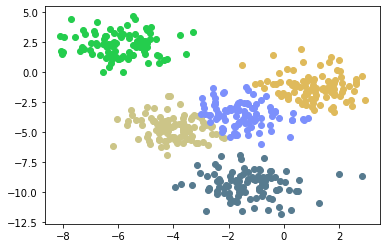

In [5]:
printR2sol(points, sol, K)

In [3]:
#testiamo il kmeans sulle 12 istanze di test:
n_points = [500,1000,1000,1000,1000,1000,1500,1500,2000,3000,5000,10000]
n_clusters = [5,2,4,5,6,7,5,10,5,5,5,10]
dim_points = [32,32,32,32,20,20,18,18,18,16,16,16]

vals = []

for test in tqdm(range(1,13)):
    points = load_points(f'C:/Users/franc/Documents/GitHub/Ricerca_Operativa_2022/Ricerca_Operativa_2022/benchmark/benchmark{test}.txt')
    N = len(points)
    K = n_clusters[test-1]
    best_val = -1
    for i in range(20): 
        sol = k_means(points, K)
        val = squared_inner_distance(sol, points, K)
        if(best_val == -1 or best_val > val):
            best_val = val
    vals.append(val)


with open("risultatiKMEANS.txt", 'w') as file:
    file.write("K-means:\n")
    file.write(str(vals))

100%|██████████| 12/12 [24:36<00:00, 123.01s/it]


In [4]:
print(vals)

[150216.1467626589, 23914.54118390938, 53783.462907318586, 4298.202713332564, 26382.357996921353, 14035.308369898128, 4496.3788205423025, 12985.753603654346, 18390.804237598553, 168224.91318260625, 13629.118976451575, 23296.418891140915]


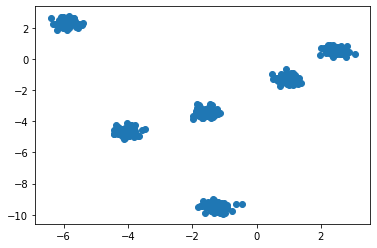

100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

: 

: 

In [5]:
#Identificare il numero ottimo di cluster:

points, centroids = make_blobs(n_samples=500, centers=6, n_features=2, random_state=2, cluster_std = 0.2)

plt.scatter(points[:,0], points[:,1])
plt.show()


cluster_val = []
for i in tqdm(range(5,6)):
    best_val = -1
    for i in range(10): 
        sol = k_means(points, i)
        val = squared_inner_distance(sol, points, i)
        if(best_val == -1 or best_val > val):
            best_val = val
            print(best_val)
    cluster_val.append(best_val)

plt.plot(range(2,20), cluster_val)